In [8]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

sns.set_context('notebook')
sns.set_style('white')

In [9]:
# 载入数据

digits = load_digits()

In [10]:
digits.data.shape

(1797, 64)

In [11]:
from sklearn.cluster import KMeans

In [12]:
starttime = time.time()
scores = []
for seed in range(1000):
    kms = KMeans(n_clusters=10, random_state=seed, init='random', max_iter=3000)
    kms.fit(digits.data)
    data = np.c_[digits.data, digits.target, kms.labels_]
    finaldata = pd.DataFrame(data)
    scores.append(len(finaldata[finaldata[64] == finaldata[65]]) / len(finaldata))
maxscore = np.max(scores)
maxseed = np.argmax(scores)
endtime = time.time()

In [27]:
print('The best score is: %.2f' % maxscore)
print('The best random seed is: ', maxseed)
print('Time used for searching the best score: %.2f' %((endtime - starttime) / 60), 'mins')

The best score is: 0.53
The best random seed is:  773
Time used for searching the best score: 2.60 mins


In [28]:
kms = KMeans(n_clusters=10, random_state=maxseed, init='random', max_iter=3000)

In [29]:
kms.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=3000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=773, tol=0.0001, verbose=0)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2, random_state=0)

In [32]:
pca.fit_transform(digits.data)

array([[ -1.2594669 ,  21.27488194],
       [  7.95761044, -20.76870098],
       [  6.9919235 ,  -9.95598367],
       ...,
       [ 10.80128405,  -6.96025216],
       [ -4.8721031 ,  12.42395171],
       [ -0.34438831,   6.36555109]])

In [33]:
finalDatapre = np.c_[pca.fit_transform(digits.data), kms.labels_]

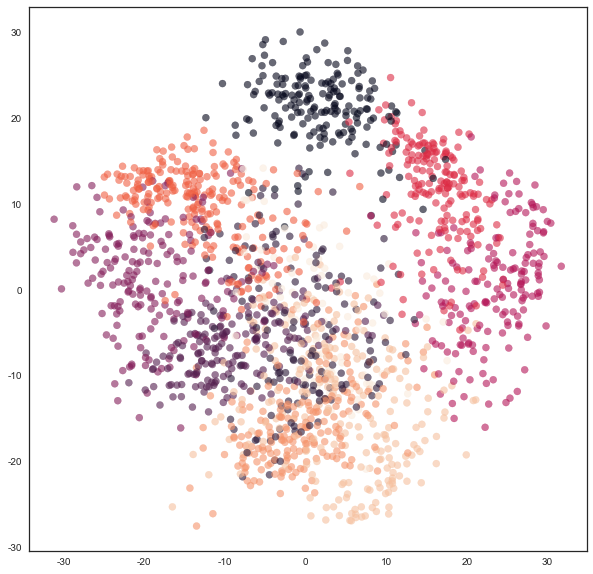

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(finalDatapre[:, 0], finalDatapre[:, 1], c=finalDatapre[:, 2], s=50, alpha=0.6)

In [35]:
finalDatatrue = np.c_[pca.fit_transform(digits.data), digits.target]

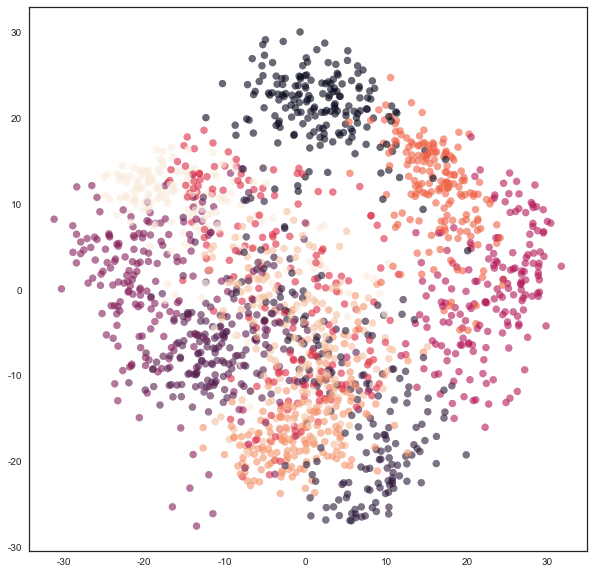

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(finalDatatrue[:, 0], finalDatatrue[:, 1], c=finalDatatrue[:, 2], s=50, alpha=0.6)

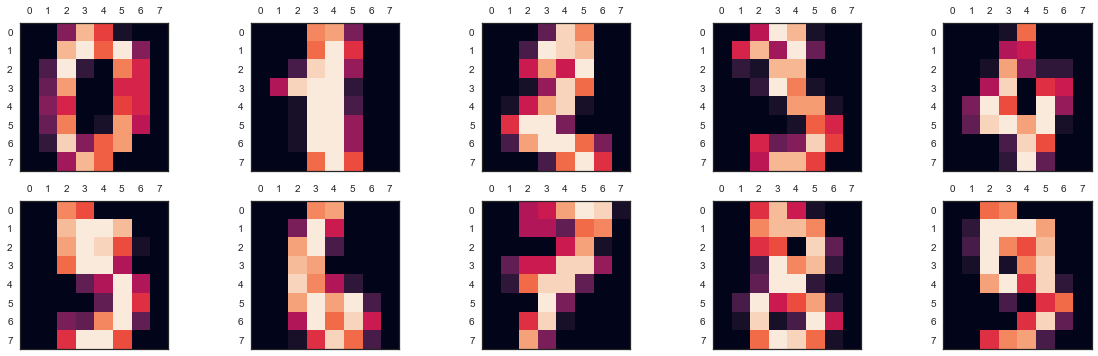

In [37]:
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
for i in range(2):
    for j in range(5):
        axes[i, j].matshow(digits.data[5 * i + j].reshape(8, 8))